# Assignment 4

# MAS DSE200

## Instructions

* You don’t need to explain your approach (unless specified) so please be concise in your submission. 
* To obtain full marks for a question, both the answer and the code should be correct. 
* Completely wrong (or missing) code with correct answer will result in zero marks. 
* Please code the solution in the space provided.<br><br>
* Code output format is specified like this when applicable
<i style='color:blue'>
* Output Required:
    * datatype or format -- description
    * datatype or format -- description
    *  ...
</i>

### Imports

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import json
from math import pi

%matplotlib inline

### Company Revenue Data

#### Fields
* Store Number(corresponds to the county)

Categories of consumer goods:
* Convenience
* Shopping
* Specialty
* Unsought
* Other

Investment data
#### Fields
* State Code
* County Code
* Name
* Percentage Investment

Your task in this section is to show how the investments made by the company in different places affected its sale of consumer goods

It is an open-ended task. We are looking to see whether you can visualize the data and identify trends.

In [2]:
consumer_goods_df = pd.read_csv("consumer_goods.csv")
investments_df = pd.read_csv("investments.csv")
print("DataFrame for consumer goods data:", consumer_goods_df.shape)
print("DataFrame for investment data:", investments_df.shape)
print(consumer_goods_df)
print(investments_df)

DataFrame for consumer goods data: (14052, 7)
DataFrame for investment data: (3194, 4)
                 Name  Store Number  Convenience  Shopping  Specialty  \
0      AUTAUGA COUNTY          1001        80867      7447      53842   
1      BALDWIN COUNTY          1003       338236     23710     145180   
2      BARBOUR COUNTY          1005        10116      2342       5434   
3        EUFAULA CITY          1005        26182      3558      15900   
4         BIBB COUNTY          1007        32486      3664      21846   
...               ...           ...          ...       ...        ...   
14047       UINTA CO6         56041        13832       500       8471   
14048       WASHAKIE2         56043         3726       258       2429   
14049    WASHAKIE CO1         56043        25693      1594      17718   
14050      WESTON CO1         56045        15935       999       9977   
14051      WESTON CO7         56045         6803       219       5125   

       Unsought   Other  
0         

## Part 1: Clustering (consumer goods data)

We will perform cluster analysis on counties using their consumer goods sales figures.
This uses `consumer_goods_df` defined above

### 1.0 Some Visualization 
Generate a histogram plot with 100 bins of the Convenience consumer goods (in the `Convenience` column) of `consumer_goods_df` to get a sense of the items sold in this category. What is the maximum number of items sold in this category and at which store(find the `Name` of the store)?

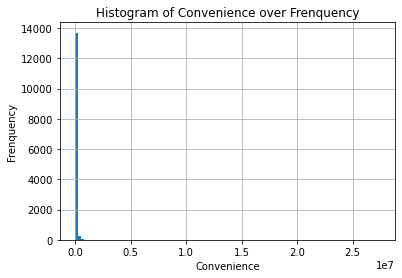

Maximum number: 27448356 

8378    NEW YORK CITY
Name: Name, dtype: object


In [3]:
# Please notice that the histogram only reflects the original dataframe.
# We can use plt.xlim() and plt.ylim() to set ranges, and plt.rcParas["figure.figsize"] to set the figure size for better visualization.

plt.hist(consumer_goods_df['Convenience'], bins=100)
plt.title("Histogram of Convenience over Frenquency")
plt.xlabel("Convenience")
plt.ylabel("Frenquency")
plt.grid()
plt.show()

max_number = consumer_goods_df['Convenience'].max()
print('Maximum number:', max_number, '\n')

store_name = consumer_goods_df[consumer_goods_df['Convenience'] == max_number].Name
print(store_name)

### 1.1 Data 
Print the DataFrame's shape as well as it's first few entries. Remove null entries(if any). 


<i style='color:blue'>
<ul><li>Output Required:<ul>
    <li>tuple     -- DataFrame's shape</li>
    <li>DataFrame -- The head of the `consumer_goods_df` DataFrame</li>
    <li>Yes/No  -- Were there any missing values? If yes, remove them.</li>
</ul></li></ul>
</i>

In [4]:
df_shape = consumer_goods_df.shape
print("DataFrame's shape for consumer goods data:\n", df_shape, "\n")

df_head = consumer_goods_df.head()
print("The head of the consumer goods data:\n", df_head, "\n")

null_entries = consumer_goods_df.isnull().any()
print(null_entries, "\n")

has_null_entries = consumer_goods_df["Name"].isnull().any() or consumer_goods_df["Store Number"].isnull().any() or consumer_goods_df["Convenience"].isnull().any() or consumer_goods_df["Shopping"].isnull().any() or consumer_goods_df["Specialty"].isnull().any() or consumer_goods_df["Unsought"].isnull().any() or consumer_goods_df["Other"].isnull().any()

if has_null_entries == False :
    print("No, there were no missing values.")
else:
    consumer_goods_df.dropna()
    print("Yes, there were missing values.")

DataFrame's shape for consumer goods data:
 (14052, 7) 

The head of the consumer goods data:
              Name  Store Number  Convenience  Shopping  Specialty  Unsought  \
0  AUTAUGA COUNTY          1001        80867      7447      53842     19578   
1  BALDWIN COUNTY          1003       338236     23710     145180    169346   
2  BARBOUR COUNTY          1005        10116      2342       5434      2340   
3    EUFAULA CITY          1005        26182      3558      15900      6724   
4     BIBB COUNTY          1007        32486      3664      21846      6976   

    Other  
0   76672  
1  299880  
2   10070  
3   29843  
4   31662   

Name            False
Store Number    False
Convenience     False
Shopping        False
Specialty       False
Unsought        False
Other           False
dtype: bool 

No, there were no missing values.


### 1.2 Features - 2 points

We'll now construct a new DataFrame containing only the features we want to use for clustering.<br>
**Start by creating a copy of consumer_goods_df** using DataFrame.copy so that you have an unaltered copy of the original. <br>
Then, **drop the these columns**: `Name`, `Store number`.<br>
You must then **normalize the data.** <br><br>


<i style='color:blue'>
<ul><li>Output Required:<ul>
        <li>tuple     -- DataFrame's shape</li>
        <li>DataFrame -- The head of the DataFrame</li>
</ul></li></ul>

In [5]:
from sklearn import preprocessing

copy_of_consumer_goods_df = consumer_goods_df.copy()
new_df = copy_of_consumer_goods_df.drop(['Name','Store Number'], axis=1)

ndf_shape = new_df.shape
print("DataFrame's shape:\n", ndf_shape, "\n")

ndf_head = new_df.head()
print("The head of the DataFrame:\n", ndf_head, "\n")

normalized = preprocessing.normalize(new_df)
print("The normalized data:\n", normalized)

DataFrame's shape:
 (14052, 5) 

The head of the DataFrame:
    Convenience  Shopping  Specialty  Unsought   Other
0        80867      7447      53842     19578   76672
1       338236     23710     145180    169346  299880
2        10116      2342       5434      2340   10070
3        26182      3558      15900      6724   29843
4        32486      3664      21846      6976   31662 

The normalized data:
 [[0.64424539 0.05932822 0.42894457 0.1559726  0.61082497]
 [0.67026846 0.04698514 0.28769727 0.33558605 0.59425994]
 [0.64730914 0.14986141 0.3477143  0.14973343 0.64436566]
 ...
 [0.63168135 0.03918967 0.43561009 0.15688159 0.62054401]
 [0.62794519 0.03936726 0.39316029 0.19541765 0.64138287]
 [0.62307529 0.02005784 0.4693901  0.13362735 0.61089404]]


### 1.3 KMeans Clustering

Define a model using <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html'>sklearn.cluster.kmeans</a><br>
**Pick any value for the number of clusters for now. When you finish all parts to this question, you can come back and experiment.**<br>
Print the model to see all the parameter values.<br>
Then, fit the model to your normalized data. <br>
Print the resulting cluster centers.<br><br>


<i style='color:blue'>
<ul><li>Output Required:<ul>
        <li>Initialized K-Means model; shows all parameter values</li>
        <li>list -- Cluster centers from fitted model</li>
</ul></li></ul>

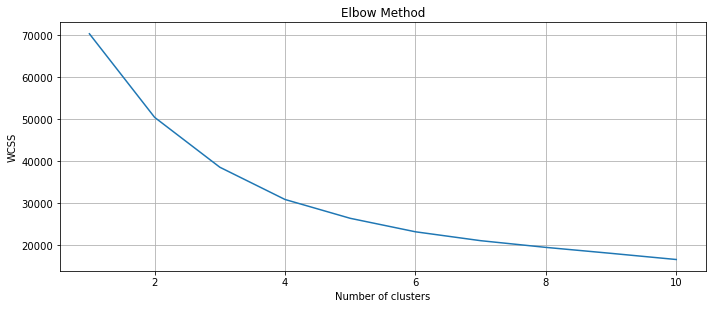

The best elbow (n_clusters) is 4 

model:
 KMeans(n_clusters=4) 

Cluster centers:
 [[ 0.18457379  0.02538606  0.6935022  -0.60581811 -0.05632878]
 [ 0.04730002 -0.39063467 -1.02338108  1.13347718 -0.28966734]
 [ 0.55972929  4.03425884 -0.66335451 -0.73988017 -0.08130627]
 [-2.99077546 -0.28587337 -0.56794602 -0.32466326  2.85240191]] 



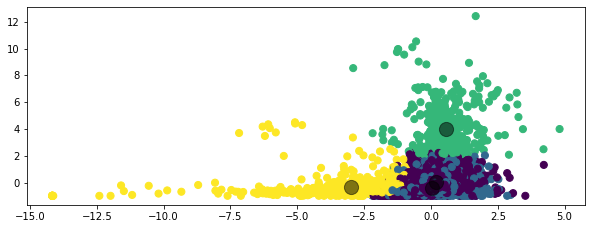

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator, DataGenerator

X_input = StandardScaler().fit_transform(normalized)

# plot the elbow method
wcss = []
for i in range(1, 11):
    kmeans_p = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_p.fit(X_input)
    wcss.append(kmeans_p.inertia_)
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.tight_layout()
plt.show()

# find the best elbow
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
elbow = kl.elbow
print("The best elbow (n_clusters) is", elbow, "\n")

# print the model, fit the model to the normalized data
kmeans = KMeans(n_clusters = elbow)
model = kmeans.fit(X_input)
print("model:\n", model, "\n")

# print the resulting cluster centers
centers = model.cluster_centers_
print("Cluster centers:\n", centers, "\n")

predict = kmeans.predict(X_input)

plt.figure(figsize=(10,8))
plt.subplot(2, 1, 2)
plt.scatter(X_input[:, 0], X_input[:, 1], c=predict, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### 1.4 Visualize and Analyze Cluster Centers
**a)**
Create a Pandas DataFrame containing all the cluster centers.<br>
You'll need to add a column titled 'cluster' containing the ID of the cluster. A cluster's ID is its index in the list you printed in **1.3**. Note that this process is shown in the k-means clustering notebook.<br>
Print the entire resulting DataFrame.<br>


<i style='color:blue'>
<ul><li>Output Required:<ul>
        <li>DataFrame -- Cluster centers dataframe<ul>
            <li>Columns should be: Convenience, Shopping, Specialty, Unsought, Other, cluster</li></ul>
        </li>
</ul></li></ul>

In [7]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('cluster')

	# Zip with a column called 'cluster' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['cluster'] = P['cluster'].astype(int)
	return P
    
features = ['Convenience', 'Shopping', 'Specialty', 'Unsought', 'Other']
P = pd_centers(features, centers)
print(P)

   Convenience  Shopping  Specialty  Unsought     Other  cluster
0     0.184574  0.025386   0.693502 -0.605818 -0.056329        0
1     0.047300 -0.390635  -1.023381  1.133477 -0.289667        1
2     0.559729  4.034259  -0.663355 -0.739880 -0.081306        2
3    -2.990775 -0.285873  -0.567946 -0.324663  2.852402        3


**b)**
Plot the resulting centers. 

<i style='color:blue'>
<ul><li>Output Required:<ul>
        <li>Parallel plot like the one in 12_WeatherDataClusteringUsing-k-Means.ipynb</li>
</ul></li></ul>

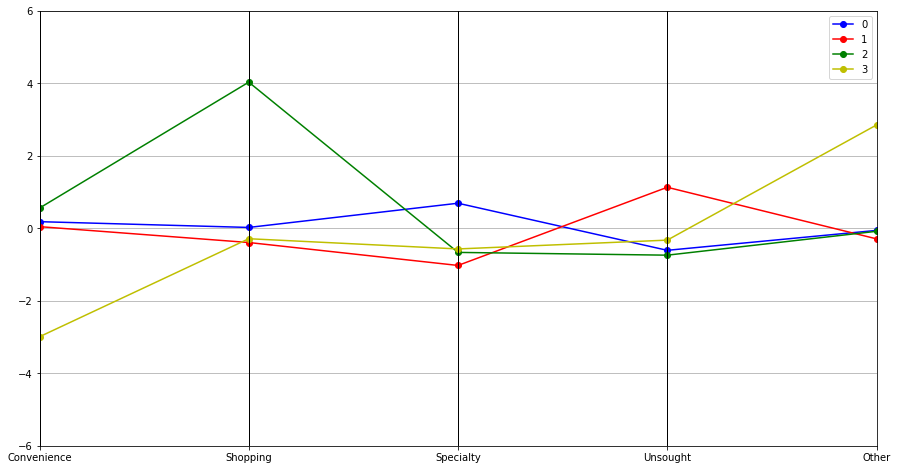

In [8]:
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-6,+6])
	parallel_coordinates(data, 'cluster', color = my_colors, marker='o')

parallel_plot(P)

**c)**
Create a new DataFrame by adding a `cluster` column to the original `consumer_goods_df` DataFrame. This is a convenient way of storing what cluster each sample belongs to.<br>
There are multiple ways of getting cluster ID's for each sample from our mode, read the <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html'>docs</a> for ideas. Get these labels and concatenate them as a new column onto `consumer_goods_df`.<br><br>
Print the DataFrame's shape and head.<br><br>


<i style='color:blue'>
<ul><li>Output Required:<ul>
        <li>(tuple) DataFrame's shape</li>
        <li>(DataFrame) The head of the DataFrame; should have cluster column</li>
</ul></li></ul>

In [9]:
new_consumer_goods_df = consumer_goods_df.copy()

predict_data = kmeans.predict(X_input)
new_consumer_goods_df['cluster'] = predict_data

new_df_shape = new_consumer_goods_df.shape
print("DataFrame's shape for new consumer goods data:\n", new_df_shape, "\n")

new_df_head = new_consumer_goods_df.head()
print("The head of the new consumer goods data:\n", new_df_head, "\n")

DataFrame's shape for new consumer goods data:
 (14052, 8) 

The head of the new consumer goods data:
              Name  Store Number  Convenience  Shopping  Specialty  Unsought  \
0  AUTAUGA COUNTY          1001        80867      7447      53842     19578   
1  BALDWIN COUNTY          1003       338236     23710     145180    169346   
2  BARBOUR COUNTY          1005        10116      2342       5434      2340   
3    EUFAULA CITY          1005        26182      3558      15900      6724   
4     BIBB COUNTY          1007        32486      3664      21846      6976   

    Other  cluster  
0   76672        0  
1  299880        1  
2   10070        0  
3   29843        0  
4   31662        0   



**d)**
Print the size of each cluster (number of samples classified as that cluster) using the DataFrame created in **c**


<i style='color:blue'>
<ul><li>Output Required:<ul>
        <li>(ints) A cluster ID and cluster size per cluster</li>
</ul></li></ul>

In [10]:
label_list = new_consumer_goods_df["cluster"].to_list()
unique_list = new_consumer_goods_df["cluster"].unique()
    
for i in range(0,len(unique_list)):
    counter = 0
    for j in range(0, len(label_list)):
        if label_list[j] == unique_list[i]:
            counter += 1
    print("Cluster ID =", unique_list[i], "Cluster Size =", counter)

Cluster ID = 0 Cluster Size = 8104
Cluster ID = 1 Cluster Size = 4823
Cluster ID = 3 Cluster Size = 663
Cluster ID = 2 Cluster Size = 462


### 1.5 Experiments (Open Ended)
Return to **1.3** and try different values for k (n_clusters). Observe how your choice in k affects your results in **1.4**. Once you've tried a few different values, pick the one that you think is "best" and leave that as your argument when you submit this assignment. In this question, write a short paragraph explaining your observations and why you chose the k you did. Use these questions to guide your explanation. 


<i style='color:blue'>
<ul><li>Output: Paragraph that answers these questions:<ul>
        <li>How did different values of k affect cluster sizes?</li>        
        <li>What k worked best?</li>
        <li>What does best really mean here, though?</li>
</ul></li></ul>

--- respond here ---

In [11]:
print("Different values of k lead to different cluster size per cluster.\nThe bigger the k, the smaller the cluster size per cluster.\n")
print("k = 4 worked best.\n")
print("It means that it is the optimal number of clusters.\n(k = 4) is the one that maximizes the average silhouette over a range of possible values for k.\nThe results show that 4 clusters maximize the average silhouette values.\n")  


Different values of k lead to different cluster size per cluster.
The bigger the k, the smaller the cluster size per cluster.

k = 4 worked best.

It means that it is the optimal number of clusters.
(k = 4) is the one that maximizes the average silhouette over a range of possible values for k.
The results show that 4 clusters maximize the average silhouette values.



## Part 2: Regression (Consumer Goods Data and Investments Data)

We will perform linear regression to use our financial data to predict projected investments.

### 2.1 Merge Datasets
We'll be using the `Percentage Investment` column from `investments_df` as our label.<br>
In order to associate these labels with the correct counties, we must merge our two DataFrames using the county code.<br><br>

Use `consumer_goods_df`'s `Store Number` column and `investments_df`'s `County Code` column to merge the DataFrames.<br><br> Your end goal is to produce a DataFrame with the columns:<br> `Store Number`, `Convenience`, `Shopping`, `Specialty`, `Unsought`, `Other`, `Percentage Investment`<br>
It's important to inspect the head of the merged DataFrame before dropping the columns not listed above. This way, you can reassure yourself you merged the DataFrames properly.<br><br>

<i style='color:blue'>
<ul><li>Output Required:<ul>
        <li>tuple     -- DataFrame's shape</li>
        <li>DataFrame -- The head of the DataFrame (either with all the columns or just the ones listed above)</li>
</ul></li></ul>

In [12]:
result = pd.merge(consumer_goods_df,
                 investments_df[["Percentage Investment", "County Code"]],
                 how = "inner",
                 left_on = "Store Number",
                 right_on = "County Code")

result_df = result.drop(["Name", "County Code"],1)

rdf_shape = result_df.shape
print("DataFrame's shape:\n", rdf_shape, "\n")

rdf_head = result_df.head()
print("The head of the data:\n", rdf_head, "\n")

DataFrame's shape:
 (4636, 7) 

The head of the data:
    Store Number  Convenience  Shopping  Specialty  Unsought   Other  \
0          1101       301121     42712     169038     89371  296474   
1          1101         9473       326       5276      3871    8943   
2          1103        99476      9576      45791     44109  109323   
3          1103        78919      6537      41600     30782   81220   
4          1103        30401      1588      17791     11022   29601   

  Percentage Investment  
0                  18.8  
1                  18.8  
2                  15.8  
3                  15.8  
4                  15.8   



### 2.2 Train and test split
Shuffle your data and then partition it into an 80%/20% train/test split.<br>
Then, split up your train and test into a features DataFrame (X_train/X_test) and a labels DataFrame (y_train/y_test)<br>
X_train and X_test should have these columns: `Convenience`, `Shopping`, `Specialty`, `Unsought`, `Other`<br>
y_train and y_test should have this column: `Percentage Investment`<br>
<br><br> 


<i style='color:blue'>
<ul><li>Output Required:<ul>
        <li>tuple -- X_train DataFrame shape</li>
        <li>tuple -- y_train DataFrame shape</li>
        <li>tuple -- X_test DataFrame shape</li>    
        <li>tuple -- y_test DataFrame shape</li>
</ul></li></ul>

In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

features = ['Convenience', 'Shopping', 'Specialty', 'Unsought', 'Other']
target = ['Percentage Investment']

new_result_df = result_df.dropna()

X_input = new_result_df[features]
y_target = new_result_df[target]

X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.2, train_size=0.8, random_state=324)

xtrain_shape = X_train.shape
print('X_train DataFrame shape', xtrain_shape)

ytrain_shape = y_train.shape
print('y_train DataFrame shape', ytrain_shape)

xtest_shape = X_test.shape
print('X_test DataFrame shape', xtest_shape)

ytest_shape = y_test.shape
print('y_test DataFrame shape', ytest_shape)

X_train DataFrame shape (3708, 5)
y_train DataFrame shape (3708, 1)
X_test DataFrame shape (928, 5)
y_test DataFrame shape (928, 1)


### 2.3 Fit a regressor
**a)**
Create a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">linear regression model</a> and fit it to your training dataset.<br>

<i style='color:blue'>
    <ul>
        <li>No output necessary</li>
    </ul>
</i>

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**b)**
Use your model to predict on your test set. Report the RMSE.

<i style='color:blue'>
<ul><li>Output: Paragraph that answers these questions:<ul>
    <li>float -- RMSE</li>
</ul></li></ul>

In [15]:
y_prediction = regressor.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print("RMSE =", RMSE, "\n")
print('RMSE (Root Mean Square Error) is the standard deviation of the residuals (prediction errors).\nIt tells you how concentrated the data is around the line of best fit.\nIt is commonly used in climatology, forecasting, and regression analysis to verify experimental results.\nLower values of RMSE indicate better fit.\nRMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.\n')

RMSE = 5.229033811705091 

RMSE (Root Mean Square Error) is the standard deviation of the residuals (prediction errors).
It tells you how concentrated the data is around the line of best fit.
It is commonly used in climatology, forecasting, and regression analysis to verify experimental results.
Lower values of RMSE indicate better fit.
RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

